In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)


(1797, 64)
(1797, 2)


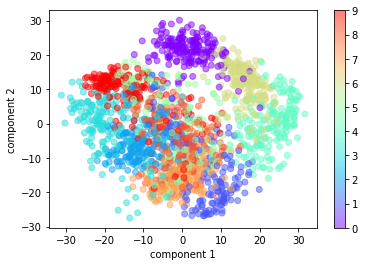

In [4]:
import matplotlib.pyplot as plt

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, alpha=0.5,cmap='rainbow')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


visualizing the 2 components


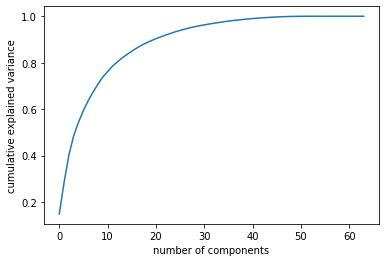

In [5]:
import numpy as np

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [6]:
pca=PCA(35).fit_transform(digits.data)

Impute some noise in the dataset. Visualize the dataset with and without noise. Then apply PCA on noisy dataset to remove the noise.

In [7]:
digits.data.shape



(1797, 64)

Function to visualize data without noise

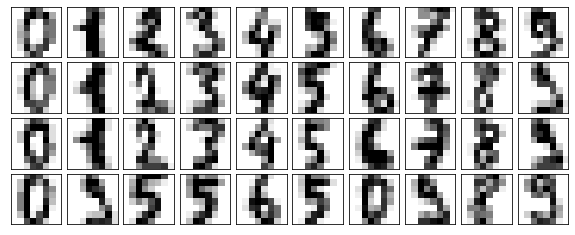

In [8]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary')
plot_digits(digits.data)


add noise


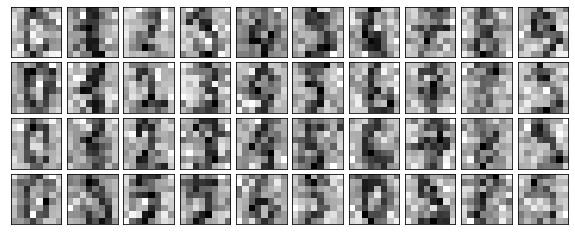

In [9]:
import numpy as np
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)


In [10]:
pca = PCA(6).fit(noisy)
pca.n_components_


6

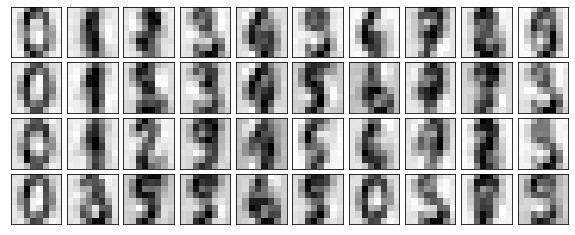

In [11]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)
